
## SGD set-up for a Kuramoto-type McKean-Vlasov SDE

Consider a McKean-Vlasov (MKV) SDE of the following form:

\begin{equation}
\textrm{d}X_t = \bigl(\mathbb{E}[\sin(X_t)] \cos(X_t) - \mathbb{E}[\cos(X_t)] \sin(X_t) \bigr) \textrm{d} t + \sigma \, \textrm{d} W_t, \quad X_0 = x_0.
\end{equation}

- Method 2: 
    
    We approximate the solution $X_t, t \in [0,T]$ by using a polynomial approximation for the function $\mathbb{E}[\sin(X_t)]$ and $\mathbb{E}[\cos(X_t)].$ In particular we use $\widehat{\gamma}_{1,k}, k=1,\ldots,K,$ as the value of $\mathbb{E}[\sin(X_t)]$ for $t \in \{t_1, \ldots, t_K\},$ and $\widehat{\gamma}_{2,k}, k=1,\ldots,K,$ as the value of $\mathbb{E}[\cos(X_t)]$ for $t \in \{t_1, \ldots, t_K\},$ where the values $\{t_1, \ldots, t_K\},$ are either Chebychev or Lagrange nodes in the time interval $[0, T].$ The process with polynomial function approximation is generated as:
    
    \begin{equation}
    \textrm{d}Z_t = \bigl(\cos(Z_t)\sum^{K}_{k=1} \widehat{\gamma}_{1,k} \prod_{\substack{ 1\leq j \leq K \\ k\neq j}} \frac{t-t_j}{t_k - t_j}  -  \sin(Z_t) \sum^{K}_{k=1} \widehat{\gamma}_{2,k} \prod_{\substack{ 1\leq j \leq K \\ k\neq j}} \frac{t-t_j}{t_k - t_j}  \bigr) \textrm{d} t + \sigma \, \textrm{d} W_t, \quad Z_0 = x_0.
    \end{equation}
    
    The gradient processes $\xi^k_{1,t}:= \partial_{\widehat{\gamma}_{1,k}}Z_t$ and $\xi^k_{2,t}:= \partial_{\widehat{\gamma}_{2,k}}Z_t$ for $k = 1, \ldots, K,$ are given as 
    
    \begin{align}
    \textrm{d}\xi^k_{1,t} &= \bigl(-\sin(Z_t)\xi^k_{1,t} \sum^{K}_{k=1} \widehat{\gamma}_{1,k} \prod_{\substack{ 1\leq j \leq K \\ k\neq j}} \frac{t-t_j}{t_k - t_j} + \cos(Z_t) \prod_{\substack{ 1\leq j \leq K \\ k\neq j}} \frac{t-t_j}{t_k - t_j}\bigr) \textrm{d} t,\\
    &+ \bigl(-\cos(Z_t)\xi^k_{1,t} \sum^{K}_{k=1} \widehat{\gamma}_{2,k} \prod_{\substack{ 1\leq j \leq K \\ k\neq j}} \frac{t-t_j}{t_k - t_j}\bigr) \textrm{d} t, \quad \xi^k_{1,0} = 0,\\
    \textrm{d}\xi^k_{2,t} &= \bigl(-\sin(Z_t)\xi^k_{2,t} \sum^{K}_{k=1} \widehat{\gamma}_{1,k} \prod_{\substack{ 1\leq j \leq K \\ k\neq j}} \frac{t-t_j}{t_k - t_j}\bigr) \textrm{d} t,\\
    &+ \bigl(-\cos(Z_t)\xi^k_{2,t} \sum^{K}_{k=1} \widehat{\gamma}_{2,k} \prod_{\substack{ 1\leq j \leq K \\ k\neq j}} \frac{t-t_j}{t_k - t_j} - \sin(Z_t) \prod_{\substack{ 1\leq j \leq K \\ k\neq j}} \frac{t-t_j}{t_k - t_j}\bigr) \textrm{d} t, \quad \xi^k_{2,0} = 0.
    \end{align}
    
    We disretise the time interval $[0, T]$ uniformly into $M + 1$ steps, and insert Chebychev nodes to create a final time grid with $M+K$ intermediate points to generate discretised path of $Z$ and gradient processes. Our aim is to find the fixed-point of the map $\widehat{\Psi}^{(M+K)}$ defined as
    \begin{equation}
      \widehat{\Psi}^{(M+K)}(\widehat{\gamma}):= \mathcal{P}\Bigl(\Psi\bigl(\mathcal{L}(\widehat{\gamma})\bigr)\Bigr).
    \end{equation}
    
    In the linear MKV-SDE considered here, we have $\Psi\bigl(\mathcal{L}(\widehat{\gamma})\bigr)(t) = \bigl(\mathbb{E}[\sin(Z_t)], \mathbb{E}[\cos(Z_t)]\bigr).$ We compute the fixed-point by solving the following: 
    \begin{equation}
    \big| \widehat{\gamma} - \widehat{\Psi}^{(M+K)}(\widehat{\gamma})\big|^2.
    \end{equation}
    
    To perform the numerical step, we vectorize $\widehat{\gamma}$ and $\widehat{\Psi}^{(M+K)}(\widehat{\gamma})$ by concatenating the rows to create a vector. Thus $\widehat{\gamma} = (\widehat{\gamma}_{1,1}, \ldots, \widehat{\gamma}_{1,K}, \widehat{\gamma}_{2,1}, \ldots, \widehat{\gamma}_{2,K}).$
    
    \begin{equation}
    F_i(\widehat{\gamma}, W) = \sin(Z_{t_i}) - \widehat{\gamma}_{1,i}, i=1, \ldots, K, \quad \text{and,} \quad F_i(\widehat{\gamma}, W) = \cos(Z_{t_i}) - \widehat{\gamma}_{2,i}, i=K+1, \ldots, 2K.
    \end{equation}
    
    The Jacobian matrix is then given as 
    \begin{equation}
        J_{\widehat{\gamma}}F = \begin{bmatrix}
                                \nabla^\top F_1(\widehat{\gamma}, W) \\
                                \vdots\\
                                \nabla^\top F_{2K}(\widehat{\gamma}, W)
                                \end{bmatrix}
                                = \begin{bmatrix}
                                    \frac{\partial F_1}{\partial \widehat{\gamma}_{1,1}} \ldots \frac{\partial F_1}{\partial \widehat{\gamma}_{2,K}}\\
                                    \vdots \ddots \vdots \\
                                    \frac{\partial F_{2K}}{\partial \widehat{\gamma}_{1,1}} \ldots \frac{\partial F_{2K}}{\partial \widehat{\gamma}_{2,K}}\\
                                    \end{bmatrix}
                               = \begin{bmatrix}
                                   \cos(Z_{t_1}) \xi^1_{1,t_1} - 1 & \cos(Z_{t_1}) \xi^2_{1,t_1} & \ldots & \cos(Z_{t_1}) \xi^{K}_{2,t_1}\\
                                   \cos(Z_{t_2}) \xi^1_{1,t_2} & \cos(Z_{t_2}) \xi^2_{1,t_2} - 1 & \ldots & \cos(Z_{t_2}) \xi^K_{2,t_2}\\
                                   -\sin(Z_{t_K}) \xi^1_{1,t_K} & -\sin(Z_{t_K}) \xi^2_{1,t_K} & \ldots & -\sin(Z_{t_K}) \xi^K_{2,t_K} - 1
                               \end{bmatrix}.
    \end{equation}

### Implementation for Method 2

#### *Import relevant libraries*

In [9]:
import random
import time
import math
import numpy
from numpy import pi
import matplotlib.pyplot as plt

#### *Import plot libraries*

In [10]:
from res.plot_lib import plot_data, plot_model, set_default
set_default()

#### *Chebyvchev nodes*

In [11]:
def CC_nodes(a, b, n):
    i = numpy.array(range(n))
    x = numpy.cos((2 * i + 1) * pi /(2 * n))
    z = 0.5 * (b-a) * x + 0.5 * (b + a)
    return numpy.flip(z, 0)

#### *Parameters*

In [12]:
M = 100  # number of discretisation steps
K = 10  # number of Chebychev nodes
x0 = 1
sigma = 1
alpha = - 0.5
beta = 0.3
T = 0.2
dt = T / M
max_iter = 10000
batch_size = 100

#### *Compute time grid and factors in polynomial approximation*

In [13]:
tspace = numpy.linspace(0, T, M + 1, dtype=float) # discretisation points
tnodes = CC_nodes(0, T, K) # Chebychev nodes

tspace = numpy.concatenate((tspace, tnodes), axis=0)
tspace.sort()

#identify the indices of Chebychev nodes in the time discretisation array
tnodes_idx = numpy.zeros(K, dtype=int)
tspace_ceil = numpy.uint(numpy.ceil(tspace * M / T))
tspace_err = numpy.around(numpy.abs(tspace * M / T - tspace_ceil), 4)

ctr = 0
for j in range(M+K+1):
    if tspace_err[j] != 0.0 and tspace_err[j] != 1.0:
        tnodes_idx[ctr] = j
        ctr += 1
        
tspace_fact = numpy.ones((M + K, K)) # M + K time factors for K different Chebychev nodes, t = 0 not required
tnode_prod = numpy.zeros(K) 

# compute products in the denominator of polynomial approxmiation factor
for k in range(K):
    temp_prod = tnodes[k] - numpy.delete(tnodes, k)
    tnode_prod[k] = numpy.prod(temp_prod)

# compute time factors in the polynomial approxmiation
for i in range(M+K):
    for k in range(K):
        temp_prod = tspace[i + 1] - numpy.delete(tnodes, k)
        tspace_fact[i][k] =  numpy.prod(temp_prod) / tnode_prod[k]

#### *Define Kuramoto-type MKV SDE class*

In [14]:
class MKVSDEkuramoto_approx():
    def __init__(self, M, K):
        super().__init__()
        self.path = numpy.zeros(M+K+1)
        self.path_grad = numpy.zeros(M+K+1) # sample path to be used for gradient process
        self.grad = numpy.zeros((2,K,M+K+1)) # gradient processes
    
    def generatepath(self, x0, gamma, alpha, beta, sigma, M, K, tspace, dW):
        self.path[0] = x0
        self.path_grad[0] = x0
        for i in range(M+K):
            dt = tspace[i+1] - tspace[i]
            self.path[i+1] = self.path[i]  + numpy.cos(self.path[i]) * numpy.dot(gamma[0], tspace_fact[i]) * dt \
            - numpy.sin(self.path[i]) * numpy.dot(gamma[1], tspace_fact[i]) * dt \
            + sigma * dt ** 0.5 * dW[0][i]
            self.path_grad[i+1] = self.path_grad[i]  + numpy.cos(self.path_grad[i]) * numpy.dot(gamma[0], tspace_fact[i]) * dt \
            - numpy.sin(self.path_grad[i]) * numpy.dot(gamma[1], tspace_fact[i]) * dt \
            + sigma * dt ** 0.5 * dW[1][i]
            for k in range(K):
                self.grad[0][k][i+1] = self.grad[0][k][i] + numpy.cos(self.path_grad[i]) * tspace_fact[i][k] * dt \
                - numpy.sin(self.path_grad[i]) * self.grad[0][k][i] * numpy.dot(gamma[0], tspace_fact[i]) * dt \
                - numpy.cos(self.path_grad[i]) * self.grad[0][k][i] * numpy.dot(gamma[1], tspace_fact[i]) * dt
                self.grad[1][k][i+1] = self.grad[1][k][i] - numpy.sin(self.path_grad[i]) * tspace_fact[i][k] * dt \
                - numpy.cos(self.path_grad[i]) * self.grad[1][k][i] * numpy.dot(gamma[1], tspace_fact[i]) * dt
                - numpy.sin(self.path_grad[i]) * self.grad[1][k][i] * numpy.dot(gamma[0], tspace_fact[i]) * dt

# seed initialise
random.seed(42)

# start_time = time.time()
# gamma = x0 * numpy.random.randn(2,K)
# Z = MKVSDEkuramoto_approx(M, K)
# dW = numpy.random.randn(2,M+K)
# Z.generatepath(x0, gamma, alpha, beta, sigma, M, K, tspace, dW)
# print("--- %s seconds ---" % (time.time() - start_time))

# plt.plot(tnodes, Z.grad[0][5][tnodes_idx])

#### Test bench

In [15]:
# x = numpy.array([0, 1, 4, 9])
# y = numpy.array([2, 3, 6, 7])
# w = [8, 9, 3, 10]

# z = numpy.array([x[0:2],x[2:4]])
# print(z[1])

# print(x * y)
# z = x
# z = numpy.vstack([z, y])
# z = numpy.vstack([z, w])
# z = numpy.transpose(z)
# z = numpy.vstack([z, z])
# z = numpy.hstack([z, z])
# print(z)
# a = numpy.array([[1,2],[3,4]])
# b = numpy.array([[5,6],[7,8]])

# a * b

# gamma = 2.5 * x0 * numpy.ones((2,K))
# # print(numpy.concatenate([numpy.sin(gamma[0]), numpy.cos(gamma[1])]))

# mat1 = numpy.concatenate([numpy.cos(gamma[0]), -numpy.sin(gamma[1])])
# mat1 = numpy.transpose(numpy.tile(mat1, (2*K,1)))
# print(mat1.shape)
# print(mat1[1])

# gamma = 2.5 * x0 * numpy.ones((2,K,M+K+1))
# mat1 = numpy.vstack([numpy.cos(gamma[0][0][tnodes_idx]), -numpy.sin(gamma[1][0][tnodes_idx])])
# for i in range(K-1):
#     tempmat = numpy.vstack([numpy.cos(gamma[0][i+1][tnodes_idx]), -numpy.sin(gamma[1][i+1][tnodes_idx])])
#     mat1 = numpy.vstack([mat1, tempmat])
# mat1 = numpy.hstack([mat1, mat1])
# mat1 = numpy.transpose(mat1)
# print(mat1.shape)


#### *SGD*

In [16]:
lr = 0.01 # learning rate
l2pen = 0 # l2 penalization parameter
error_tol = 10 ** -4 # error tolerance
error = 1000
gamma = x0 * numpy.ones((2,K))
Z = MKVSDEkuramoto_approx(M, K)
gamma_aver = numpy.zeros((2,K))
dW = numpy.random.randn(max_iter,2,M+K)
jacobian = numpy.zeros((2*K,2*K))

start_time = time.time()
ctr = 0 # iteration counter
while ctr < max_iter and error > error_tol:
    Z.generatepath(x0, gamma, alpha, beta, sigma, M, K, tspace, dW[ctr])
    loss_grad = 2 * (numpy.concatenate([numpy.sin(Z.path[tnodes_idx]), numpy.cos(Z.path[tnodes_idx])]) \
                     - numpy.concatenate([gamma[0], gamma[1]]))
        
    # matrix of basis function at independent path values
    jacob1 = numpy.concatenate([numpy.cos(Z.path_grad[tnodes_idx]), \
                                -numpy.sin(Z.path_grad[tnodes_idx])])
    jacob1 = numpy.transpose(numpy.tile(jacob1, (2*K,1))) 
    
    # final matrix of gradient values -- This part needs to be generalised and optimised
    jacob2_1 = Z.grad[0][0][tnodes_idx]
    jacob2_2 = Z.grad[1][0][tnodes_idx]
    for i in range(K-1):
        jacob2_1 = numpy.vstack([jacob2_1, Z.grad[0][i+1][tnodes_idx]])
        jacob2_2 = numpy.vstack([jacob2_2, Z.grad[1][i+1][tnodes_idx]])
    jacob2_1 = numpy.transpose(jacob2_1)    
    jacob2_2 = numpy.transpose(jacob2_2)
    jacob2_1 = numpy.vstack([jacob2_1, jacob2_1])
    jacob2_2 = numpy.vstack([jacob2_2, jacob2_2])
    jacob2 = numpy.hstack([jacob2_1, jacob2_2])
    
    # element wise product
    jacobian = jacob1 * jacob2 
    jacobian = jacobian - numpy.eye(2*K)
    gamma_prev = gamma
    gamma_prev_SGD = numpy.concatenate([gamma_prev[0], gamma_prev[1]])
    
    gamma_SGD = gamma_prev_SGD * (1 - l2pen) - lr * numpy.matmul(loss_grad, jacobian)
    
    gamma = numpy.array([gamma_SGD[0:K],gamma_SGD[K:2*K]])
    gamma_aver += gamma

    if (ctr + 1) % 1000 == 0:
        print('Iteration: [{}/{}] '.format(ctr, max_iter))
    ctr += 1

print("---Run time for SGD algo: %s seconds ---" % (time.time() - start_time))

print(gamma_aver / max_iter)

Iteration: [999/10000] 
Iteration: [1999/10000] 
Iteration: [2999/10000] 
Iteration: [3999/10000] 
Iteration: [4999/10000] 
Iteration: [5999/10000] 
Iteration: [6999/10000] 
Iteration: [7999/10000] 
Iteration: [8999/10000] 
Iteration: [9999/10000] 
---Run time for SGD algo: 201.33430552482605 seconds ---
[[0.8419074  0.83696175 0.82844212 0.81835782 0.80852535 0.79680986
  0.78747117 0.78066821 0.77466171 0.77196989]
 [0.54195211 0.54099815 0.53809206 0.53296163 0.52498379 0.51875509
  0.51231936 0.50651004 0.50465651 0.50326393]]


#### *Monte Carlo benchmark*

In [17]:
N = 10000000
ZMC1 = numpy.zeros(N)
ZMC1 = x0 # starting value
gamma1 = numpy.zeros(M+K+1)
gamma2 = numpy.zeros(M+K+1)

gamma1[0] = numpy.mean(numpy.sin(ZMC1))
gamma2[0] = numpy.mean(numpy.cos(ZMC1))
ZMC2 = numpy.zeros(N)

dW = numpy.random.randn(M+K,N)
for i in range(M+K):
        dt = tspace[i+1] - tspace[i]
        ZMC2 = ZMC1  + numpy.cos(ZMC1) * gamma1[i] * dt \
        - numpy.sin(ZMC1) * gamma2[i] * dt \
        + sigma * dt ** 0.5 * dW[i]
        
        ZMC1 = ZMC2
        gamma1[i+1] = numpy.mean(numpy.sin(ZMC1))
        gamma2[i+1] = numpy.mean(numpy.cos(ZMC1))

print(gamma1[tnodes_idx])
print(gamma2[tnodes_idx])

[0.84095725 0.83696735 0.82956388 0.8199148  0.809234   0.79875811
 0.78931992 0.78173336 0.77642648 0.77370962]
[0.53996382 0.53735149 0.53263384 0.52644665 0.51961361 0.51288791
 0.50691574 0.50208968 0.49873326 0.497011  ]


Text(0.5, 1.0, 'max_iter = 10000, N_MC = 10000000, M = 100, K = 10, T = 0.2')

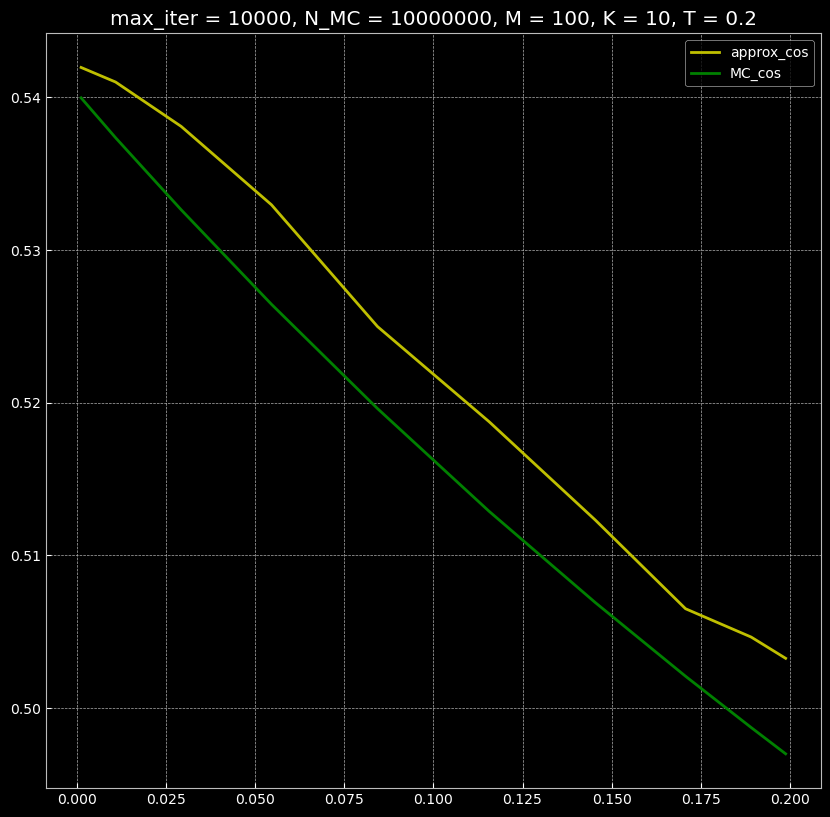

In [18]:
# print(numpy.sum(numpy.abs(gamma_aver / max_iter - gamma_benchmark[tnodes_idx])))
plt.plot(tspace[tnodes_idx], gamma_aver[1] / max_iter, 'y', label='approx_cos')
plt.plot(tspace[tnodes_idx], gamma2[tnodes_idx], 'g', label='MC_cos')
plt.legend()
plt.title('max_iter = ' + str(max_iter) + ', N_MC = ' + str(N) + ', M = ' + str(M) + ', K = ' + str(K) + ', T = ' + str(T))